length of featurecolumns is 784
KNN class defined.
KNN model instantiated, trained, and predictions made.
Custom KNN Accuracy Score: 0.9524
Custom KNN F1 Score: 0.9523


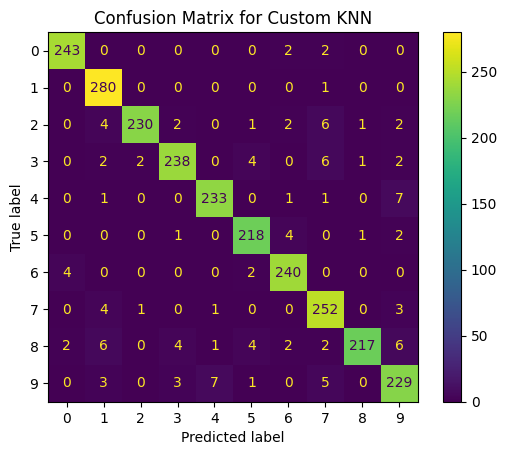

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score


def read_data():
    dftrain = pd.read_csv('MNIST_train.csv')
    dftest = pd.read_csv('MNIST_validation.csv')

    featurecols = list(dftrain.columns)
    targetcol = 'label'
    classcol = 'even'
    removecols=[targetcol, classcol]
    for i in removecols:
      featurecols.remove(i)
    print ('length of featurecolumns is', len(featurecols))

    Xtrain = np.array(dftrain[featurecols])
    Xtrain=Xtrain/255
    ytrain = np.array(dftrain[targetcol])
    Xtest = np.array(dftest[featurecols])
    Xtest = Xtest/255
    ytest = np.array(dftest[targetcol])
    return (Xtrain, ytrain, Xtest, ytest)

Xtrain, ytrain, Xtest, ytest = read_data()


import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))

    def _get_neighbors(self, x_test_point):
        distances = [self._euclidean_distance(x_test_point, x_train_point) for x_train_point in self.X_train]
        k_nearest_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_nearest_indices]
        return k_nearest_labels

    def predict(self, X_test):
        predictions = []
        for x_test_point in X_test:
            k_nearest_labels = self._get_neighbors(x_test_point)
            most_common = Counter(k_nearest_labels).most_common(1)
            predictions.append(most_common[0][0])
        return np.array(predictions)

print("KNN class defined.")

knn_model = KNN(k=5)
knn_model.fit(Xtrain, ytrain)
knn_ypred = knn_model.predict(Xtest)
print("KNN model instantiated, trained, and predictions made.")

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

accuracy = accuracy_score(ytest, knn_ypred)
f1 = f1_score(ytest, knn_ypred, average='weighted')

print(f"Custom KNN Accuracy Score: {accuracy:.4f}")
print(f"Custom KNN F1 Score: {f1:.4f}")

ConfusionMatrixDisplay(confusion_matrix(ytest, knn_ypred)).plot()
plt.title('Confusion Matrix for Custom KNN')
plt.show()